# Effects of Rider Attributes on Their Trip Duration

## by (Ikechukwu Chilaka)

### Table of Contents

1. Investigation Overview

2. Dataset Overview

3. Derived Insights

>Recommendations and Limitations

## 1 Investigation Overview

In this investigation, I will focus on the top contributors to trip duration in the top ten stations, which is the main source of revenue for the bike share system. Contributors include: age, gender, and usertype. 


## 2. Dataset Overview

This data set is 37.5MB in size and includes information about individual rides made in a bike-sharing system for the period in February 2019, covering the greater San Francisco Bay area. Originally, the dataset included 183,412 fordgobike trips 329 stations. 

Some important additional attributes were created (age, week(day of the week), period of day, start hour of trip, and day(date of the trip). A subset of top ten stations with trip duration less than 2000 secs (about 30 mins) will be the sample population (fordgobike_clean).

This sample population has 27773 and constitutes about 15% of the entire population (more than 10%) and can be considered statistically significant.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fordgobike_clean = pd.read_csv('fordgobike_clean', sep=',', encoding ='utf-8')

In [3]:
ordinal_var_dict = {'period': ['morning', 'afternoon', 'evening'],
                    'week': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    fordgobike_clean[var] = fordgobike_clean[var].astype(ordered_var)

## 3.0 Derived Insights

**Some key insights derived from the exploratory analysis of this dataset were on:**

3.1. Distribution of trip duration

3.2. Gender Trip Count and Duration

3.3. Usertype Trip Count and Duration

3.4. Duration-Age Distribution For Gender And Usertype

3.5. Trip Duration of Genders Across Ages

3.6. Trip Duration of Genders In User Types

### 3.1 Distribution of trip duration

**In our sample population that had the highest duration of trips (> 2000sec, approx 30min), trip duration follow a normal distribution with peak between 9-11mins which accounts for close to 3000 trips**

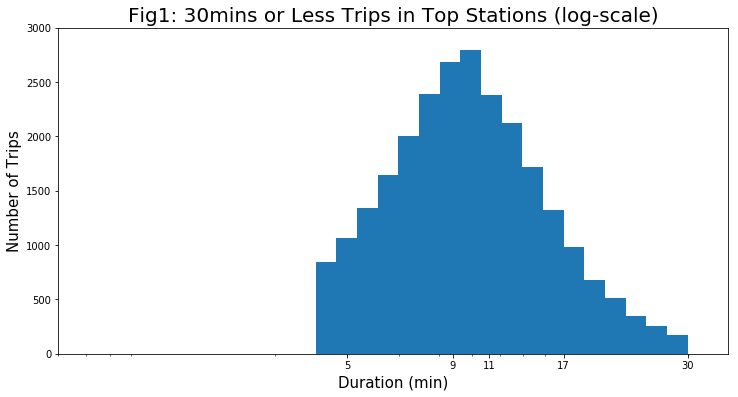

In [4]:
axis = [60,2500,0,3000]
data_log= fordgobike_clean
title_log = 'Fig1: 30mins or Less Trips in Top Stations (log-scale)'

##the logtrip function will show the logarithmic distribution of number of trips vs age plot
def logtrip():
    width = 0.05
    bins_log = 10 ** np.arange(2.4, np.log(fordgobike_clean['duration_sec'].max())+width, width)
    plt.figure(figsize = [12, 6])
    plt.hist(data = data_log, x = 'duration_sec', bins = bins_log)
    plt.title(title_log, fontsize =20)
    plt.xlabel('Duration (min)', fontsize =15)
    plt.ylabel('Number of Trips', fontsize =15)
    plt.xscale('log')
#setting xmin to 60 since the min trip duration is 61
    plt.xticks([300,540,660,1e3, 2e3], ['5','9','11', '17', '30'])
    plt.axis(axis)
    plt.show()
logtrip()
#xticks in mins, xlabel in mins

### 3.2 Gender Trip Count and Duration

**Trip Count:** Male trips are the highest; more than three times the trip by females. Another group (Others) with gender unidentified make up less than 2% of trips

**Trip Duration:** Female trips are above 10mins(600secs) on the average which is higher than males, even though males make more trip count

The Others group make just about the same length of trips just as males, but their trip durations are not centered about the mean (as indicated by the error bar).

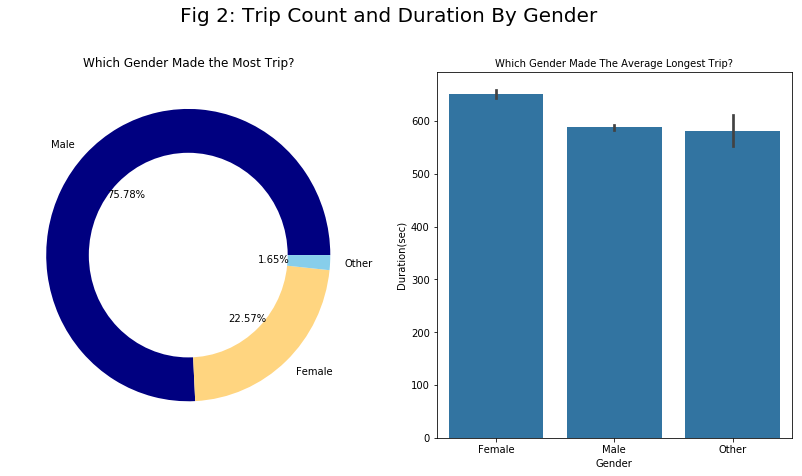

In [5]:
fig_ = plt.figure(figsize=(14,7))
plt.suptitle('Fig 2: Trip Count and Duration By Gender', fontsize=20)


fig_.add_subplot(1,2,1)
plt.subplots_adjust(top=0.85)

colors = ['#000080', '#FFD580', '#87CEEB']
plt.pie(x=fordgobike_clean['member_gender'].value_counts(),labels=fordgobike_clean['member_gender'].value_counts().index, 
        autopct=lambda p:f'{p:.2f}%', colors =colors)
#draw circle 
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
#get the current figure
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title('Which Gender Made the Most Trip?', fontsize =12)

fig_.add_subplot(1,2,2)
data= fordgobike_clean
title = "Which Gender Made The Average Longest Trip?"
sb.barplot(data=data, x='member_gender', y='duration_sec', color=sb.color_palette()[0])
plt.title(title, fontsize =10)
plt.xlabel("Gender", fontsize =10)
plt.ylabel("Duration(sec)", fontsize =10)
plt.show()

### 3.3 Usertype Trip Count and Duration

**Trip Count:** Subscribers make almost 10 times the number of trips made by customers

**Trip Duration:** But customers make 3mins(200secs) longer trips on the average than subscribers

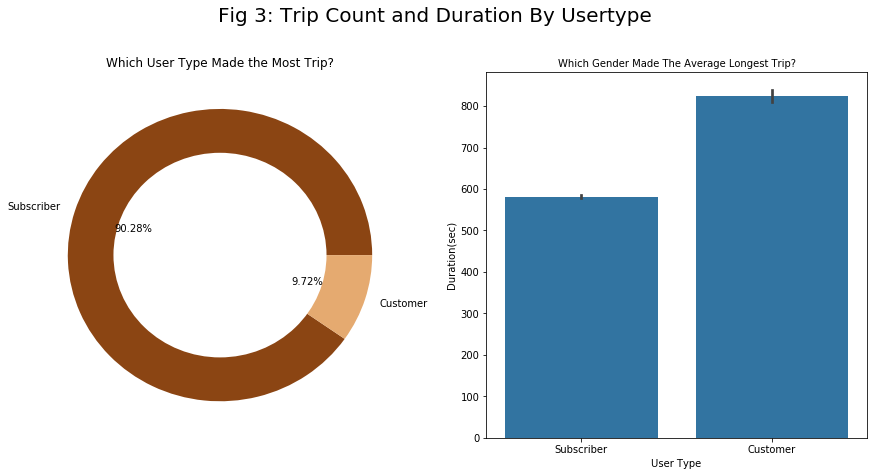

In [6]:
fig_ = plt.figure(figsize=(15,7))
plt.suptitle('Fig 3: Trip Count and Duration By Usertype', fontsize=20)


fig_.add_subplot(1,2,1)
plt.subplots_adjust(top=0.85)

colors = ['#8B4513', '#E5AA70']
plt.pie(x=fordgobike_clean['user_type'].value_counts(),labels=fordgobike_clean['user_type'].value_counts().index, 
        autopct=lambda p:f'{p:.2f}%', colors =colors)
#draw circle 
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
#get the current figure
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title('Which User Type Made the Most Trip?', fontsize =12)

fig_.add_subplot(1,2,2)
data= fordgobike_clean
title = "Which Gender Made The Average Longest Trip?"
sb.barplot(data=data, x='user_type', y='duration_sec', color=sb.color_palette()[0])
plt.title(title, fontsize =10)
plt.xlabel("User Type", fontsize =10)
plt.ylabel("Duration(sec)", fontsize =10)
plt.show()

### 3.4 Duration-Age Distribution For Gender And Usertype

**Most trips are taken by 20-40 year olds**

**Female customers clock trips in the region of 2000 secs just as males, but no significant number of trips after about 50 years**

In [7]:
#defining a function for creating heat maps in the FaceGrid
#adjusted biny
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_y = np.arange(500, 2000+500, 500)
    bins_x = np.arange(-5, 85+1, 5)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.colorbar();

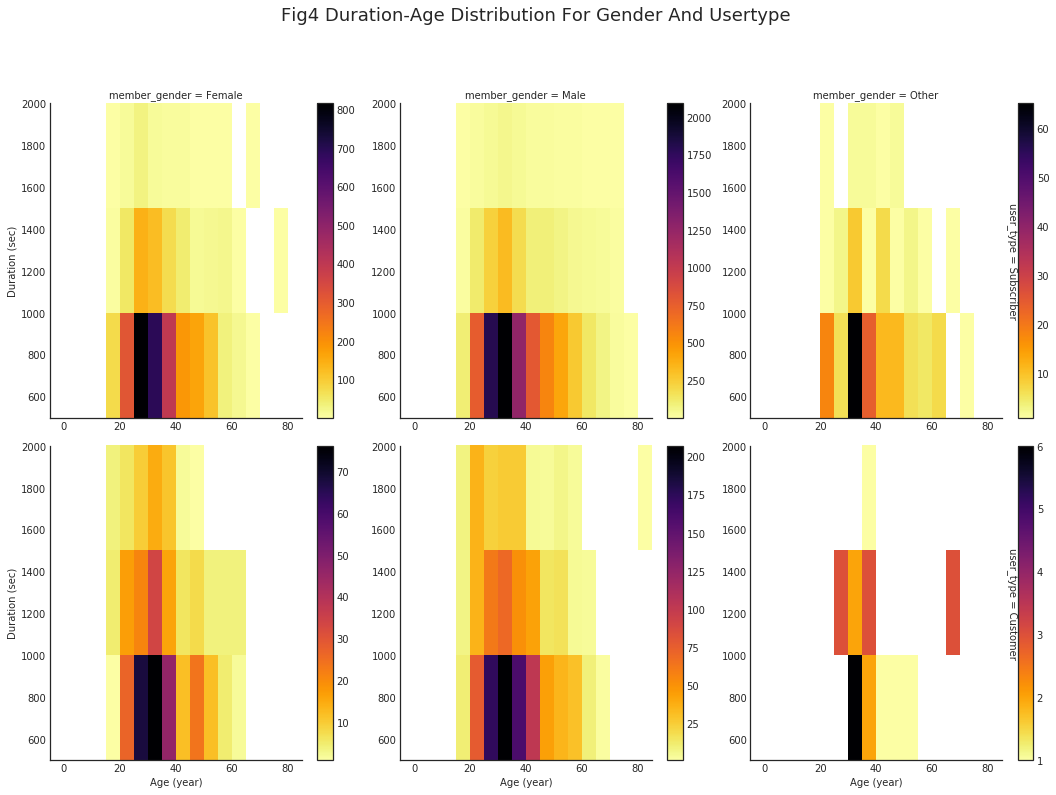

In [8]:
#set parameters
suptitle ='Fig4 Duration-Age Distribution For Gender And Usertype'
data_grid = fordgobike_clean
sb.set_style('white')
xlim = [17, 80]
ylim = [60, 2500]
#plot
def all_attributes():
    fig = plt.figure(figsize=(10,7))
    g = sb.FacetGrid(data = data_grid, col = 'member_gender', row = 'user_type', size = 5, margin_titles = True, 
                xlim =xlim, ylim=ylim);
    g.map(hist2dgrid, 'age', 'duration_sec', color='inferno_r')
    g.set_xlabels('Age (year)')
    g.set_ylabels('Duration (sec)')
    plt.suptitle(suptitle, y=1.1, fontsize=18)
    plt.show()
all_attributes()

### 3.5 Trip Duration of Genders Across Ages

**Females clocked longer duration than men consistently from 21-56 years**

**Male duration begin to dominate as fewer female trips occur at age 65**

**The duration for Others is irregular, touching highs and low around both the male and female distribution; this is the reason for the spread of data noted in Fig 2**


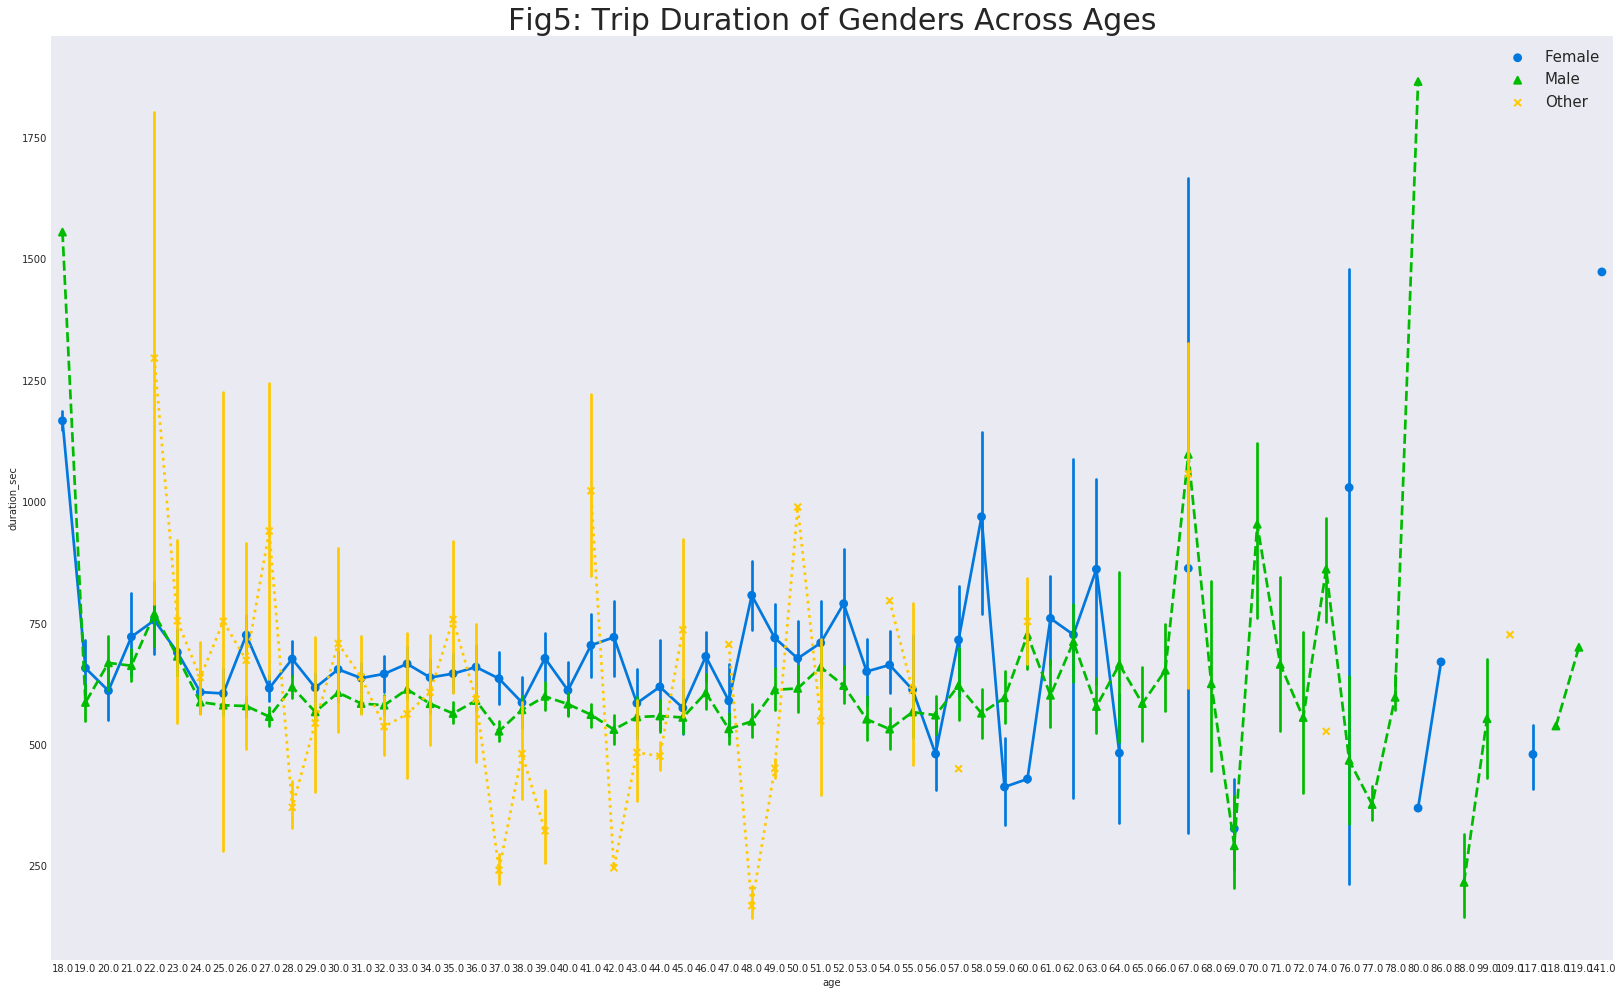

In [9]:
#Lineplot to investigate relationship between age and trip duration for each gender further

title = 'Fig5: Trip Duration of Genders Across Ages'
hue = 'member_gender'
def line():
    fig = plt.figure(figsize=(28,17))
    sb.set_style('dark')
    k = sb.pointplot(data=fordgobike_clean, x='age', y='duration_sec', hue=hue, 
             linestyles=["-", "--",":"], palette="nipy_spectral",  markers=["o","^","x"])
    plt.title(title,  fontsize=30)
    plt.legend(fontsize=15)

    plt.show()
line()

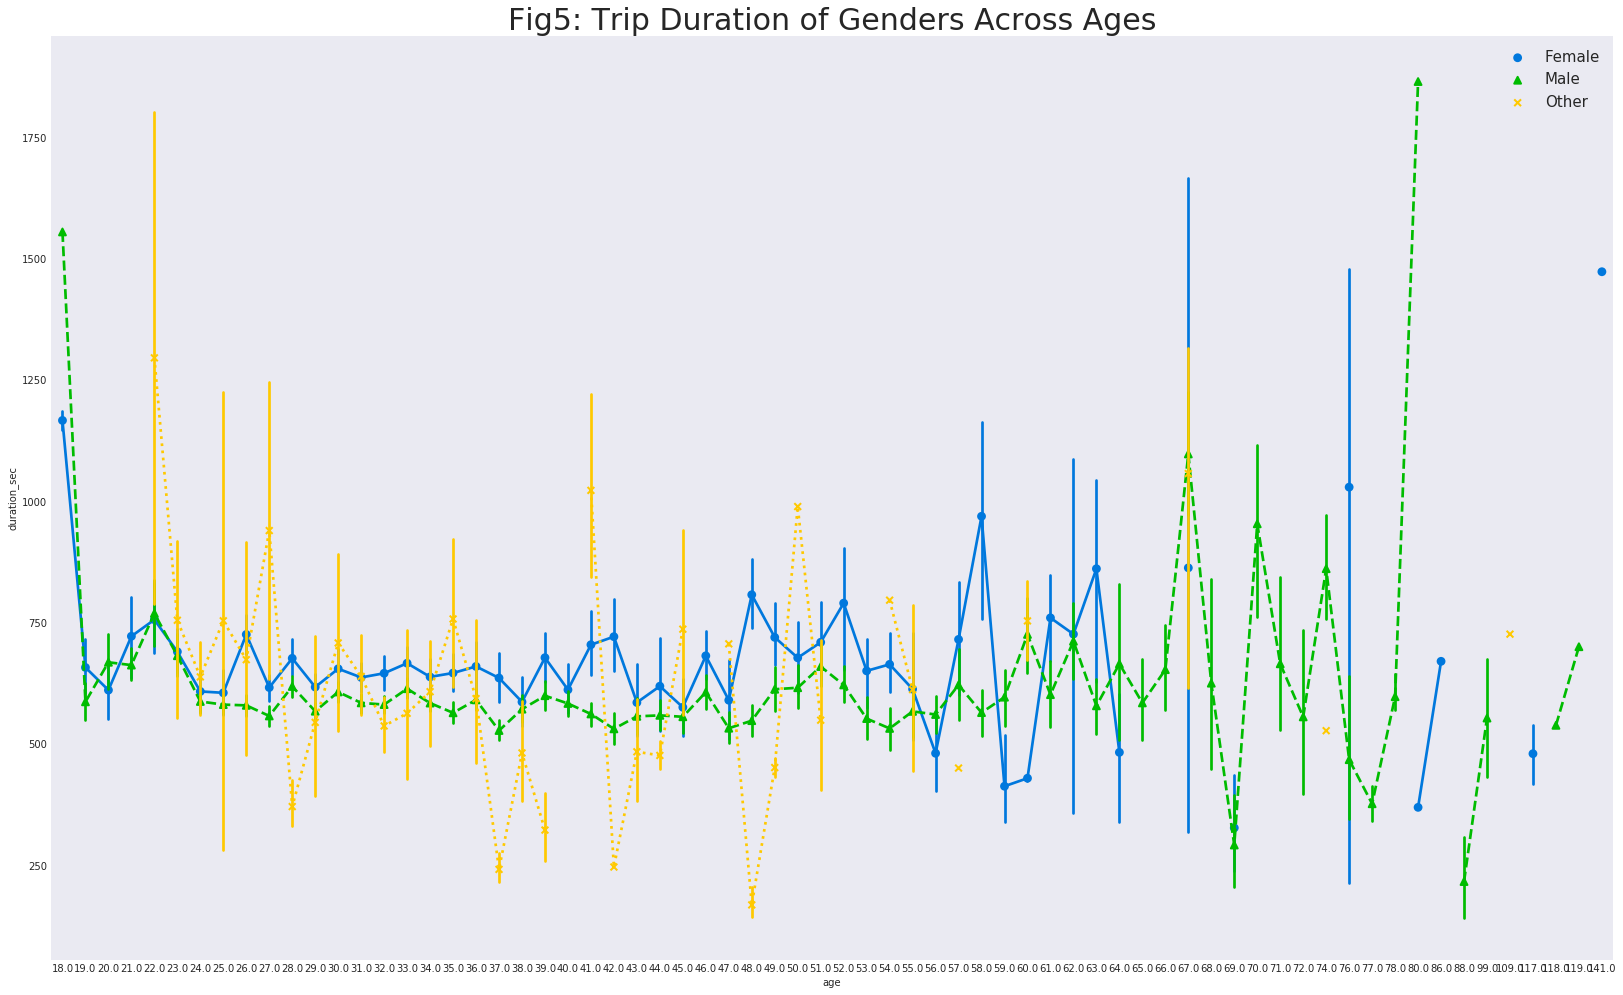

### 3.6 Trip Duration of Genders In User Types

**Subscriber:** The order of length of trips: Male > Female > Other 

**Customer:** This reverse occurs: Other > Female > Male for Customer category

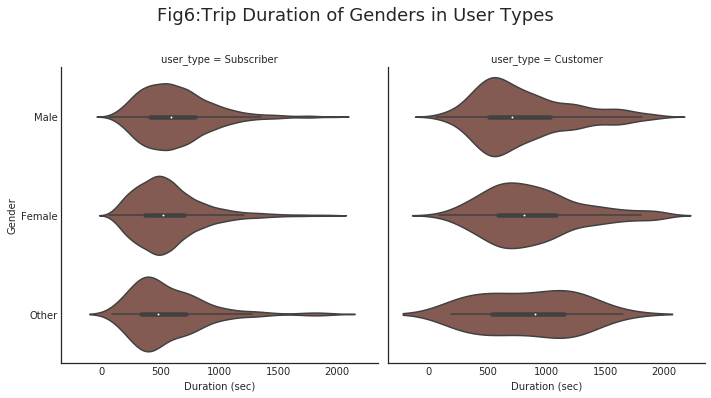

In [10]:
#violinplot plot to investigate relationship between gender and trip duration for each user_type
def violin_plot():
    sb.set_style('white')
    fig = plt.figure(figsize=(12,7))
    g = sb.FacetGrid(data = fordgobike_clean, col = 'user_type', col_wrap = 2,  size = 5)
    g.map(sb.violinplot, 'duration_sec', 'member_gender',  color=sb.color_palette()[5])
    g.set_xlabels('Duration (sec)')
    g.set_ylabels('Gender')
    plt.suptitle(('Fig6:Trip Duration of Genders in User Types'), y=1.1, fontsize=18);
violin_plot()

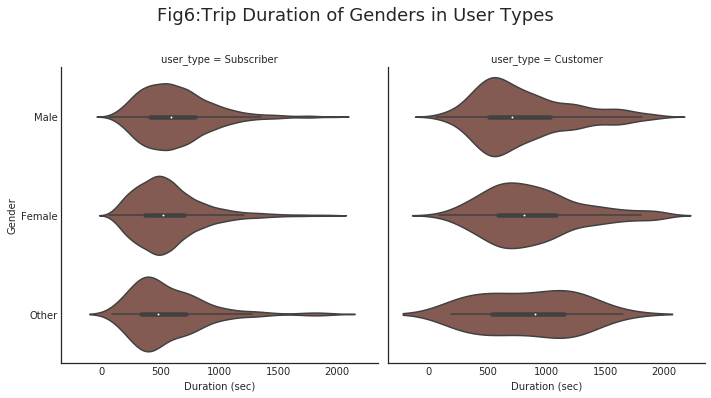

### 3.6 Trip Duration of User Types Across All Ages

**Customers consistently clock higher durations until age 60 were we see a significant dip and pause. This pause coincides with that observed in female trips from Fig 4. This suggests female customers contribute significantly to customer trips.**

**Subscribers start to experience rise and fall from age 60. This rise and fall coincides with that observed in Fig 4 where male trips dominate and female trips are diminish**

**We can deduce that these subscribers are mostly men of the aged group.**

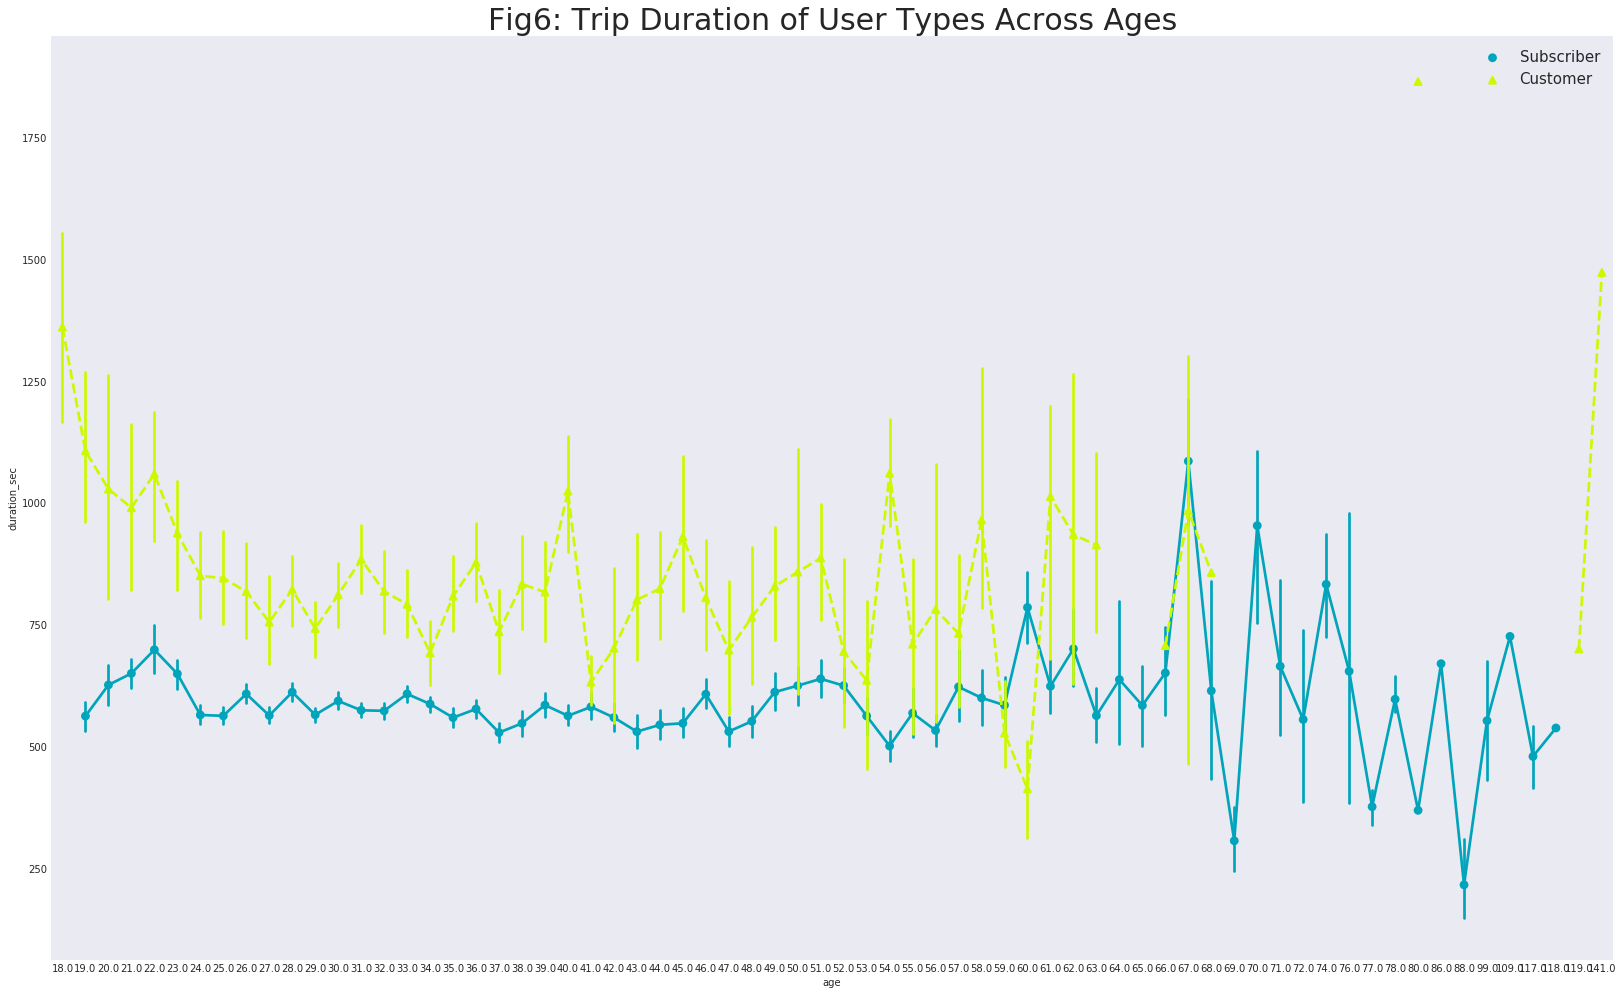

In [11]:
#Showing trip duration of usertype with age
title = 'Fig6: Trip Duration of User Types Across Ages'
hue = 'user_type'

line()

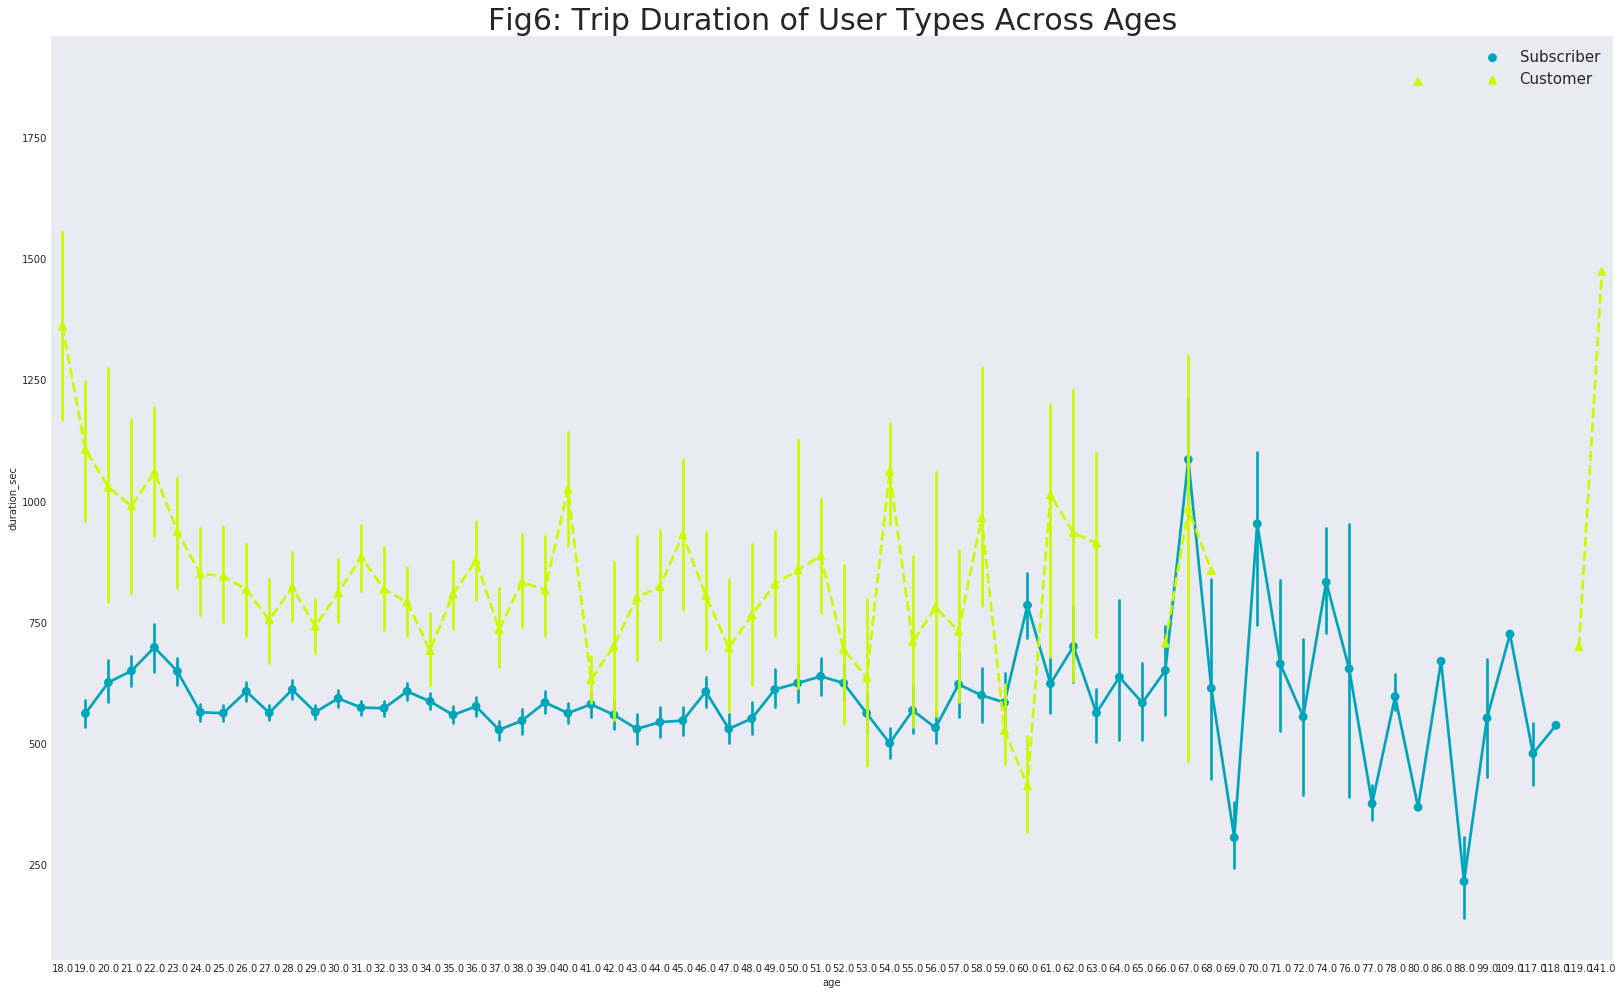

## Recommendations

>**Male subscribers make the highest users while male customers clock the lowest duration. Lesser revenue will be generated from the latter as customers are charged per trip, hence there needs to be targeted effort to convert male customers to subscribers** [Pricing = https://en.wikipedia.org/wiki/Bay_Wheels]


>**As younger people tend to clock the highest number of trips with a somewhat predictably shorter duration, they are better as subscribers. They probably use the bike as commute to work. Older people may use it as a form of exercise more and would ride longer trips...they would generate more as customers**

>**Female customers made long trips but are few in the aged population. Perhaps the bikeshare system can conduct fitness education (e.g flyer sharing), to the group.**


>**The rider behaviour of the Other group is irregular. There needs to be a more granular data collection to monitor how different riders use the bike share**


 ## Limitations

>**As there is insufficient data on women (three times less than men) and other gender. It would be difficult to draw a final conclusion. Additional data is required**

>**Sample size were stations close to one another, behavior may differ for stations not close. Recommendations may be best applied in geographical sense of the stations' locations**


# THANK YOU

In [ ]:
!jupyter nbconvert Ford_GoBike_System_Data_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Ford_GoBike_System_Data_slide_deck.ipynb to slides
[NbConvertApp] Writing 934506 bytes to Ford_GoBike_System_Data_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Ford_GoBike_System_Data_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg